In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

learn = tf.contrib.learn

mnist = learn.datasets.load_dataset('mnist')

train_data = mnist.train.images
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)

test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

tf.logging.set_verbosity(tf.logging.ERROR)

print(test_labels)

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz

Index 0: Label 7


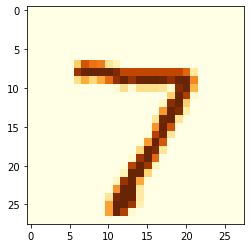

In [2]:
max_examples = 10000

data = train_data[:max_examples]

labels = train_labels[:max_examples]

plt.imshow(test_data[0].reshape((28, 28)), cmap=plt.cm.YlOrBr)
print('Index %d: Label %d' % (0, test_labels[0]))

In [3]:
print(test_data[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [4]:
input_features = learn.infer_real_valued_columns_from_input(data)

classifier = learn.LinearClassifier(feature_columns=input_features, n_classes=10)

classifier.fit(data, labels, batch_size=100, steps=1000)
classifier.evaluate(test_data, test_labels)
print(classifier.evaluate(test_data, test_labels)['accuracy'])
print(classifier.predict(np.array([test_data[0]], dtype=float), as_iterable=False))

print(test_labels[0])

0.9137
[7]
7


## 필기 숫자 데이터 세트를 기계학습 모델에 적용

### 결정트리를 이용한 경우

In [5]:
from sklearn import datasets, tree

clf = tree.DecisionTreeClassifier()
clf.fit(data, labels)

predictions = clf.predict(test_data)

from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predictions))

0.8123


### KNeighborsClassifier를 이용한 경우

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

digits = datasets.load_digits()
clf = KNeighborsClassifier()
clf.fit(data, labels)

predictions = clf.predict(test_data)

print(accuracy_score(test_labels, predictions))

0.9467


### 직접 작성한 무작위 분류 방식을 이용한 경우

In [7]:
digits = datasets.load_digits()

import random

class myKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = random.choice(self.y_train)
            predictions.append(label)
        return predictions

In [8]:
clf = myKNN()
clf.fit(data, labels)

predictions = clf.predict(test_data)

from sklearn.metrics import accuracy_score

print(accuracy_score(test_labels, predictions))

0.1013


## 직접 작성한 유클리디언라디언 분류 방식을 이용한 경우

In [9]:
from scipy.spatial import distance

def euc(a,b):
    return distance.euclidean(a,b)

class eucKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, row):
        best_dist = euc(row, self.X_train[0])
        best_index = 0
        for i in range(1, len(self.X_train)):
            dist = euc(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
                
        return self.y_train[best_indexdex]

In [12]:
digits = datasets.load_digits()

clf = eucKNN()
clf.fit(digits.data[:-500], digits.target[:-500])

predictions = clf.predict(digits.data[-500:])

print(accuracy_score(digits.target[-500:], predictions))

0.96


### 서포트 벡터머신(SVM)을 이용한 경우

In [13]:
from sklearn import svm

clf = svm.SVC(gamma=0.001, C=100.)

clf.fit(data, labels)

predictions = clf.predict(test_data)

print(accuracy_score(test_labels, predictions))

0.9417
